Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [16]:
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
data.columns = ['sepal_length','sepal_width','petal_length','petal_width']
data = data.drop(columns = ['petal_length','petal_width'])

In [10]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [18]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
lda = LinearDiscriminantAnalysis()

In [20]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [21]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2])

In [22]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [23]:
result

,0,1
0,2,2
1,1,1
2,2,2
3,1,2
4,1,2
5,1,2
6,2,1
7,2,1
8,2,2
9,2,2


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

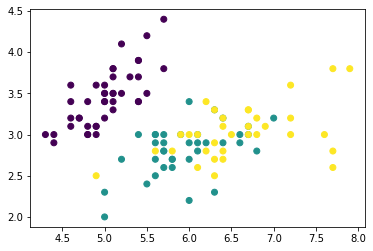

In [46]:
# визуализируем
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [28]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal_length', 'sepal_width']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal_length', 'sepal_width']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

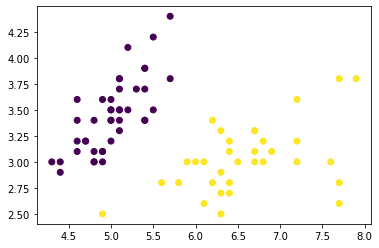

In [29]:
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.show()

In [30]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

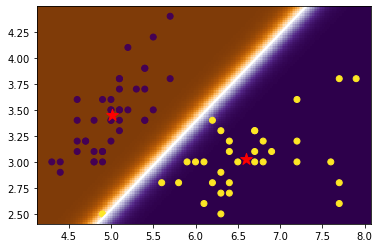

In [33]:
# сам scatter plot
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='PuOr', norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [35]:
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [43]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0,
       1, 1], dtype=int32)

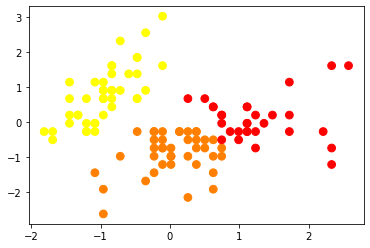

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)